In [1]:
!pip install pydlm
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from pydlm import dlm, trend, dynamic
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 8.5 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('VCB.csv')
df = df.dropna()
df

,Date,Price,Open,High,Low,Vol.,Change %
0,6/1/2018,43216,41017,43595,40866,7.57M,5.36%
1,6/4/2018,44960,42837,45187,42458,4.90M,4.04%
2,6/5/2018,44429,44429,45187,43747,4.51M,-1.18%
3,6/6/2018,44808,44050,45263,43671,2.79M,0.85%
4,6/7/2018,44505,44732,44960,44278,3.24M,-0.68%
...,...,...,...,...,...,...,...
1237,5/15/2023,91700,92000,93000,91200,450.50K,-1.19%
1238,5/16/2023,92600,92000,93100,91300,666.10K,0.98%
1239,5/17/2023,92800,92500,93000,92300,572.70K,0.22%
1240,5/18/2023,95000,92900,96000,92200,1.68M,2.37%


In [2]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
df = pd.read_csv('VCB.csv')
df = df[['Price','Date','High']]
print(df)
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

      Price       Date   High
0     43216   6/1/2018  43595
1     44960   6/4/2018  45187
2     44429   6/5/2018  45187
3     44808   6/6/2018  45263
4     44505   6/7/2018  44960
...     ...        ...    ...
1237  91700  5/15/2023  93000
1238  92600  5/16/2023  93100
1239  92800  5/17/2023  93000
1240  95000  5/18/2023  96000
1241  94200  5/19/2023  94900

[1242 rows x 3 columns]


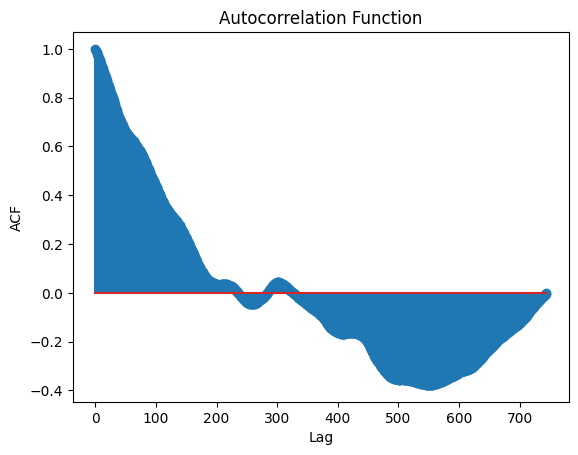

In [3]:
# Tính toán ACF
import statsmodels.api as sm
acf = sm.tsa.stattools.acf(train_data['Price'], nlags= 1000
                           )

# Vẽ đồ thị ACF
plt.stem(acf)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')
plt.show()

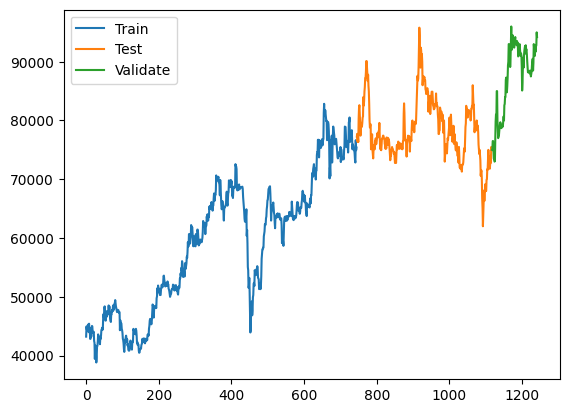

In [4]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index,val_data['Price'])
plt.legend(['Train', 'Test','Validate',])
plt.show()

In [5]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

feature = []
for price in train_data['High']:
  feature.append([price])
print(feature)
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
model = dlm(y_train)
model = model + trend(1, name='lineTrend', w=1.0)
model = model + autoReg(degree=3, data=y_train, name='ar1', w=1e7) + longSeason(period=8, stay=1, data=y_train, name='monthly', w=3.0) + dynamic(features=feature, discount=1, name='High')


[[43595], [45187], [45187], [45263], [44960], [45794], [45718], [44732], [45415], [45415], [44732], [44732], [42837], [44505], [44126], [44505], [45642], [45036], [45870], [44505], [44505], [44278], [44202], [42837], [42155], [42003], [42761], [42079], [39804], [40638], [41624], [42079], [42306], [43595], [43823], [43368], [44278], [43519], [43519], [42989], [43444], [43519], [44960], [44884], [44732], [45263], [45187], [46931], [47310], [47538], [48144], [48372], [48372], [48068], [46249], [47689], [47386], [47538], [47765], [47614], [47462], [48144], [48751], [48599], [48675], [48523], [47462], [46855], [46249], [47159], [47462], [47841], [48220], [48068], [48827], [48523], [47993], [48296], [48978], [49812], [49812], [49433], [49206], [48675], [48523], [48144], [47841], [48144], [48523], [48379], [47919], [47765], [47612], [46076], [45999], [46076], [45769], [45999], [45461], [45001], [45154], [44002], [43465], [42390], [42927], [41391], [41698], [43542], [42927], [43234], [43388], 

/usr/local/lib/python3.10/dist-packages/pydlm/modeler/autoReg.py:75: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


In [6]:

model.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [7]:
# 4. Quá trình testing
x_test= []

for price in test_data['High']:
  x_test.append([price])
print(np.array(x_test).shape)
y_test = np.array(test_data['Price'])
y_pred = model.predictN(date = model.n-1, N=len(x_test),featureDict={'High': x_test})
y_pred = y_pred[0]



(372, 1)


In [8]:

y_val = np.array(val_data['Price'])
x_val= []

for price in val_data['High']:
  x_val.append([price])
print(type(x_val))

size = test_size + val_size
y_pred_val = model.predictN(featureDict={'High': x_val}, N = len(x_val))
y_pred_val = y_pred_val[0]
print(y_pred_val)

<class 'list'>
[75406.89984448029, 77233.48357599541, 75259.54453942725, 76190.66335324946, 75142.42045496323, 75246.59250615239, 72683.55643840843, 73704.04423722552, 73244.98322566865, 77101.96946928062, 78652.26318781088, 79733.98899912543, 79551.94513977697, 83182.84895448227, 84184.21085905563, 82181.77659526374, 79750.05636457227, 79211.05125253698, 77495.51459257865, 79365.83115649813, 77503.4771023434, 78774.69840779806, 79211.95107590155, 81276.27898952762, 79196.70078306703, 80934.37888206067, 79460.47013280686, 79839.77990009171, 79485.6327142973, 79410.74951944278, 79182.59973509223, 80486.3910658996, 81053.72398536696, 81675.82485839227, 80891.45290864757, 81350.10752197921, 82122.08378685979, 82877.1143821454, 84889.50165618202, 87043.40842423172, 84423.95558901424, 83103.93113492138, 84284.83920035219, 86017.66274231029, 86584.62929497396, 88119.36612015122, 92663.4712161679, 89858.41794355525, 89216.10438953659, 88207.79150500041, 89217.63763089819, 88370.35777242504, 8

In [9]:
# 12. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 1806.845565072633
Testing RMSE: 4383.019212053632
Validation MAPE: 1.7456076588317726
Testing MAPE: 4.6326453350696895
Validation MAE: 1551.7958347043545
Testing MAE: 3523.514936798315


In [ ]:
# Dự đoán 30 ngày tiếp theo của feature 'High' dựa trên Linear Regression
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()

ln_model.fit(np.array(train_data.index).reshape(-1,1), train_data['High'])


#test
x_test_ln = np.array(test_data.index).reshape(-1, 1)
y_test_ln = np.array(test_data['High'])
y_pred_ln = ln_model.predict(x_test_ln)

# Quá trình Validate
x_val_ln= np.array(val_data.index).reshape(-1, 1)
y_val_ln = np.array(val_data)
y_pred_val_ln =  ln_model.predict(x_val_ln)

# Predict the prices for the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

feature_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
feature_next_30_days = ln_model.predict(feature_next_30_days)

print(feature_next_30_days)






[96309.37413379 96352.24919225 96395.12425071 96437.99930918
 96480.87436764 96523.7494261  96566.62448457 96609.49954303
 96652.37460149 96695.24965996 96738.12471842 96780.99977689
 96823.87483535 96866.74989381 96909.62495228 96952.50001074
 96995.3750692  97038.25012767 97081.12518613 97124.00024459
 97166.87530306 97209.75036152 97252.62541998 97295.50047845
 97338.37553691 97381.25059538 97424.12565384 97467.0007123
 97509.87577077 97552.75082923]


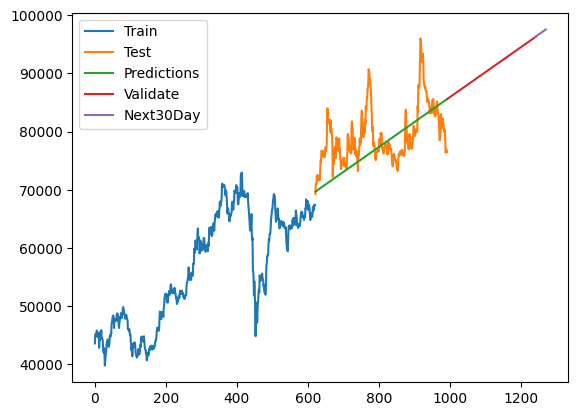

In [ ]:
plt.plot(train_data.index, train_data['High'])
plt.plot(test_data.index, test_data['High'])
plt.plot(test_data.index,y_pred_ln)
plt.plot(val_data.index,y_pred_val_ln)
plt.plot(last_data,feature_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x = []
for price in feature_next_30_days:
  x.append([price])
print(type(x))
num_dims = np.ndim(x)
print(num_dims)
y_next_30_days = model.predictN(featureDict={'High': x}, N = 30)
y_next_30_days = y_next_30_days[0]
print(y_next_30_days)


<class 'list'>
2
[96004.38337501558, 90251.39146592397, 92350.87396708045, 91100.44009137104, 91786.87904740711, 91492.39869179392, 91600.47477133914, 91748.4185240256, 91729.56628358658, 91826.91255750137, 91843.42300976353, 91860.90583372691, 92090.79846663361, 91976.30502985304, 92004.4535911835, 92184.72160676822, 92152.68176312678, 92255.54951228102, 92269.78532666291, 92288.20500429596, 92517.7096830144, 92403.37646784376, 92431.45888554816, 92611.75423657674, 92579.70310068, 92682.5755140057, 92696.80940148627, 92715.22987512803, 92944.73422502526, 92830.40114569188]


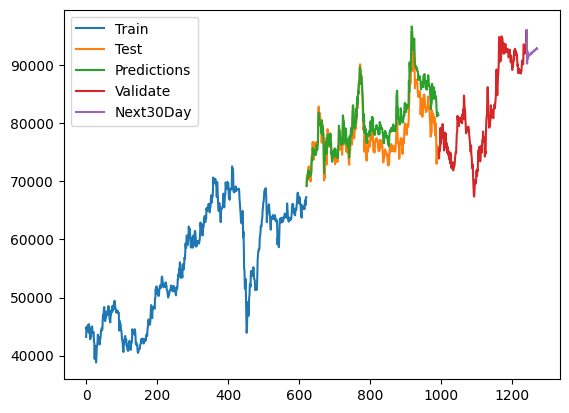

In [ ]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index,y_pred)
plt.plot(val_data.index,y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()